<a href="https://colab.research.google.com/github/codestates/ds-section1-sprint3-new/blob/main/n133%20-%20Clustering/n133%20-%20Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src='https://i.imgur.com/RDAD11M.png' width = '200' align = 'right'>

## *DATA SCIENCE / SECTION 1 / SPRINT 3 / NOTE 3*

---

# Clustering

## 🏆 학습 목표 

- K-Means Clustering에 대해서 설명 할 수 있다.
- RFM 개념에 대해서 설명 할 수 있다.
- Elbow method의 의미를 이해할 수 있다.

---

이번 노트는 아래의 구성으로 이뤄져 있습니다.

- **Part 0. Introduction** </br>
  0-1. 기획 배경

- **Part 1. Clustering** </br>
  1-1. K-Means Clustering <br>
  1-2. Elbow Method

- **Part 2. EDA** </br>
  2-1. Data Description <br>
  2-1. 데이터 정제 </br>
  2-2. Feature Engineering </br>
  2-3. Log Transformation </br>
  2-4. Data Scaling </br>

- **Part 3. Build Clustering Model** </br>
  3-1. K-Means Clustering </br>
  3-2. Elbow Method </br>

- **Part 4. 클러스터별 특징 분석**

---

## **Part 0. 기획 배경**

<img src='https://i.imgur.com/avplFWJ.png' width=550>


지금부터는 한 온라인 커머스 회사의 데이터 사이언티스트로서 ***마케팅 타겟을 분류하는 프로젝트***를 진행해보겠습니다. <br> 
우리는 머신러닝 알고리즘 중 하나인 **K-means 군집화 알고리즘**을 활용하여, <br> 
각 소비자 그룹별 **RFM 지표**의 특징을 파악하여 효율적인 마케팅 전략을 수립하는 것을 목표로 하려고 합니다. <br> 

**RFM**은 Recency, Frequency 그리고 Monetary로 구성되어 있는 지표로서, <br> 매출에 있어 **거래의 최근성, 빈도 및 총액**이 가장 중요한 Factor라고 가정하며 만든 지표인데요. <br> 
우리는 이번 프로젝트를 통해 이 RFM을 기반으로 정량적으로 고객의 순위를 지정, 그룹화하여, 최고의 고객을 식별하거나 타겟 마케팅 캠페인에 사용하려고 합니다. 









# **Part 1. Clustering** 

- **클러스터링, 군집화란?**

<p align="center">
<img src='https://i.imgur.com/3QZevbr.png' width=550>

데이터의 군집화로 널리 사용되는 비지도학습 알고리즘인 클러스터링에 대해 알아보도록 합니다. 

만약 우리가 다루는 데이터에 **레이블, Label**이 붙어 있다면 지도학습, 즉 미리 가지고 있는 데이터와 레이블을 기반으로 <br>
예측이나 분류를 수행하는 모델을 만들 수 있을것 입니다. 

그러나 실제로 데이터에는 레이블이 없는 경우가 더 많은데요. <br>
물론 이렇게 별도의 레이블이 없는 데이터 안에서 ***패턴과 구조를 발견하는 비지도 학습***이 머신러닝의 큰 축이고, <br>
그 중 가장 대표적인 비지도 학습 기술이 바로 **클러스터링, 군집화**입니다.

> **💡 Tip** <br>
참고로 지도학습의 분류 문제와는 엄연히 다릅니다. <br> 분류는 미리 레이블이 붙어 있는 데이터들을 학습해서 그걸 바탕으로 새로운 데이터에 대해 분류를 수행하지만, 클러스터링은 레이블을 모르더라도 비슷한 속성을 가진 데이터들끼리 묶어주는 역할을 하기 때문입니다.

<br>

- **클러스터링, 군집화를 사용하는 예** <br>
아래는 다양한 산업에서 클러스터링 알고리즘이 사용되어지는 common applications의 예입니다.
  - Market Segmentation
  - Social Network Analysis
  - Search Result Grouping
  - Medical Imaging
  - Image Segmentation
  - Anomaly Detection

<br>


그럼 군집화는 서로 유사한 데이터들을 같은 그룹으로, 서로 유사하지 않은 데이터는 다른 그룹으로 분리하는 것이라는 것을 알았습니다. <br> 이를 통해 군집화 하는 방법에 2개의 질문이 따라오게 되는데요.
  - 몇개의 그룹을 묶을 것인가?
  - 데이터의 유사도를 어떻게 정의할 것인가?

이 두 질문을 해결할 수 있는 유명한 전략이 바로 K-Means 알고리즘 입니다. <br> 오늘 우리는 다양한 클러스터링 알고리즘 중, **K-Means Clustering** 알고리즘에 대해 배워보도록 합니다.





### **1-1. K-Means Clustering**

- **K-Means 군집화란**

[K-Means Clustering](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html#sklearn.cluster.KMeans)은 가장 대표적인 클러스터링 알고리즘 중 하나로 **Centroid Based Clustering** 알고리즘으로도 불립니다. 

**Centroid (군집 중심점)** 이란, 주어진 클러스터 내부에 있는 **모든 점들의 중심 부분에 위치한 점**을 의미하는데요. K-Means 군집화는 Centroid라는 특정한 임의의 지점을 선택해 해당 중심점으로부터 거리가 가장 가까운 포인트를 같은 클러스터, 즉 비슷한 특성을 가진 데이터들이 모인 집단으로 묶는 방법입니다.

<p align=center>
<img src='https://i.imgur.com/W7f3rG7.png' width=600>

K-Means 군집화는 위와 같이 비슷한 종류의 데이터를 클러스터로 묶어주는데요. **데이터가 비슷하다** 라는 것은 **데이터 사이들간의 거리가 가까움을 의미**합니다. 그러므로 K-Means 군집화는 데이터들 사이의 거리를 측정한뒤 그 거리를 기반으로 가까운 데이터들끼리 클러스터로 묶어줍니다. <br>

그럼 여기서 우리가 해야할 질문은 데이터들 사이의 거리는 어떻게 측정할 것인가 입니다.

<br>

- **데이터 사이의 거리 계산** <br>

데이터 사이의 거리를 계산하는 방법에는 다양하는데요. 많이 사용되어지는 계산법은 아래와 같습니다. 
   - [Euclidean Distance](https://www.cuemath.com/euclidean-distance-formula/)
   - [Cosine Similarity](https://www.learndatasci.com/glossary/cosine-similarity/)
   - [Jaccard Distance](https://www.statology.org/jaccard-similarity/)

일반적으로 많이 쓰이는 방식은 **Euclidean Distance** 입니다. 그러나 클러스터링의 목적에 따라서 다른 계산법이 사용되어지기 때문에, 여러분이 특별히 관심있는 클러스터링 방법이 있다면 그 클러스터링의 거리 계산법에 대해서 배워보도록 합니다. 

</br> 

- **K-Means 군집화의 절차** <br>

K-Means 군집화에서 사용되어지는 거리 계산은 **Euclidean Distance** 입니다. 이 계산법을 통해 데이터 사이들의 거리를 계산하고 가까운 데이터들 끼리 묶어주게 되는데요. 데이터들을 묶어주는 과정은 **3가지 단계**를 거치게 됩니다. <br> 

그럼 아래의 데이터 분포를 우리가 Centroid를 2개로 지정했을때 (K=2) 어떻게 군집화 되는지 그 절차에 대해서 알아보도록 합니다. 


<p align=center>  
<img src='https://i.imgur.com/CyiGTEj.png' width=150>



**1. K = 2개의 임의의 중심점을 배치합니다.**
<p align=center>  
<img src='https://i.imgur.com/zvwJNTr.png' width=150>

**2. 각 데이터들을 가장 가까운 중심점으로 할당합니다.** <br>

<p align=center>
<img src='https://i.imgur.com/bfdtIZb.png' width=150>

**3. 군집으로 지정된 데이터들을 기반으로 해당 군집의 중심점을 업데이트 합니다.**
<p align=center>
<img src='https://i.imgur.com/r9r8GoY.png' width=150>

**4. 2번, 3번 단계를 최종적으로 중심점이 수렴이 될 때까지, 즉 더이상 중심점이 업데이트 되지 않을 때까지 반복합니다.**
<p align=center>
<img src='https://i.imgur.com/GGJ1n1g.png' width=150>

그럼 최종적으로 위의 데이터가 군집집화 된 모양은 아래와 같이 비슷한 데이터들끼리 잘 군집화 된것을 확인할 수 있습니다. <br>
<p align=center>
<img src='https://i.imgur.com/6FTvJrd.png' width=150> <br>

여기서 우리가 주목해야할 점은, K-Means는 이름에서도 알 수 있다시피 **K개의 중심점**을 가지고 분류를 진행하기 때문에 사용자가 지정한 K값이 결과에 영향을 미칠 수 있다는 점입니다. 따라서 추가적으로 ***최적의 K 즉, 적절한 클러스터의 개수를 찾는 방법***에 대해 알아보도록 하겠습니다.

<br>






### **1-2. Elbow Method**

위에서 우리는 Centroid의 갯수를 2개 (K=2)라고 지정을 한 뒤 데이터를 군집화 하였습니다. 우리가 2개의 그룹으로 묶을수 있는 배경에는 육안으로 데이터의 분포를 확인했을때 2개로 묶어줘야 이상적으로 데이터를 군집화 할 수 있음을 알 수 있었기 때문입니다. 

하지만 **데이터의 차원수**와 **갯수**가 많아질수록 사람의 육안으로 데이터를 몇개의 그룹으로 군집화 해야겠다는 감을 잡기가 쉽지 않습니다. 그렇게 때문에는 최대한 수학적으로 몇개의 그룹으로 데이터를 묶어줘야하는지를 계산해야 하는데요. 이것이 바로 **Elbow Method** 입니다. 

**Elbow Method**는 K-Means 군집화 알고리즘의 성능을 최대화 시키는 적합한 K의 개수를 선택하는 방법을 제공합니다. 그 방법은 emphirical method로서 다양한 K값을 이용해 데이터를 군집화 한 뒤, 각 K값에 해당하는 군집 내의 데이터들이이 얼마나 퍼져 있는지 (혹은 얼마나 뭉쳐있는지) 응집도, 즉 inertia를 값으로 확인합니다. 

> **💡 Tip** <br> 
Inertia는 각 클러스터 별 오차의 제곱의 합(분산)을 나타냅니다. 각 데이터로부터 자신이 속한 군집의 중심까지의 거리를 의미합니다. 그러므로 inertia 값이 낮을수록 군집화가 더 잘 됐다고 볼 수 있습니다.

<br>

그래서 군집의 갯수, 즉 K 값을 바꿔가면서 inertia를 그래프로 표시하면 보통 아래와 같은 모양새가 나옵니다.


<p align="center">
<img src='https://i.imgur.com/dtpaufJ.png' width=500>

> **🔍 해설** <br>
Inertia는 각 클러스터 별 오차의 제곱의 합(분산)을 나타냅니다. 따라서 일반적으로 K가 증가하면, 각 데이터들이 클러스터의 중심점에 가까워집니다. 즉, inertia가 줄어들게 되는데, 이 때 Elbow Method는 **inertia가 급격하게 변하는 지점을 최적의 K**로 설정합니다. 

> cluster의 개수가 1에서 2로 넘어갈 때 기울기가 급감하지만, 3개 이후로는 변동성이 줄어들기 때문에 3을 최적의 값으로 볼 수 있습니다. 경사 뿐만 아니라 이후의 변동성도 함께 고려하는 것입니다.


# **Part 2. EDA**

## **2-1. Data Description**

이 데이터는 2010/12/01 ~ 2011/12/09 까지 영국 중심의 온라인 소매 거래내역을 포함하고 있으며, 대부분의 고객은 도매업에 종사합니다.

> **온라인 거래내역 데이터** </br>
- `InvoiceNo`: 거래번호
- `StockCode`: 상품번호
- `Description`: 상품 설명
- `Quantity`: 개수
- `InvoiceDate`: 거래일자
- `UnitPrice`: 개당 가격
- `CustomerID`: 고객 ID
- `Country`: 고객의 주소지 (나라)

In [ ]:
# 라이브러리 불러오기
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

plt.style.use("default")

In [ ]:
# 파일 불러오기 (local에서 업로드)
from google.colab import files
files.upload()

Saving OnlineRetail.csv to OnlineRetail.csv


In [ ]:
retail = pd.read_csv('OnlineRetail.csv', sep=",", encoding="ISO-8859-1", header=0)
retail.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850.0,United Kingdom


In [ ]:
print(f'Shape of dataset: {retail.shape} \n')

retail.info()

Shape of dataset: (541909, 8) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


## **2-1. 데이터 정제**

### **a. Customer**

In [ ]:
# 결측치(missing value) 확인
retail.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

> **🔍 해설** 
- `CustomerID`에 135,080개의 결측치가 있음을 확인했습니다. 따라서 우리는 이러한 결측치가 대체 가능한 것인지 확인해보려 합니다. 다만, 이 때 해당 column은 고유값이므로, 함부로 대체할 시에 데이터의 의미가 달라질 수 있다는 점을 고려해야 할 것입니다.

In [ ]:
missing_ID = retail[retail['CustomerID'].isnull()]
missing_ID[missing_ID['InvoiceNo'].duplicated()]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
1444,536544,21774,DECORATIVE CATS BATHROOM BOTTLE,2,01-12-2010 14:32,2.51,NaN,United Kingdom
1445,536544,21786,POLKADOT RAIN HAT,4,01-12-2010 14:32,0.85,NaN,United Kingdom
1446,536544,21787,RAIN PONCHO RETROSPOT,2,01-12-2010 14:32,1.66,NaN,United Kingdom
1447,536544,21790,VINTAGE SNAP CARDS,9,01-12-2010 14:32,1.66,NaN,United Kingdom
1448,536544,21791,VINTAGE HEADS AND TAILS CARD GAME,2,01-12-2010 14:32,2.51,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
541536,581498,85099B,JUMBO BAG RED RETROSPOT,5,09-12-2011 10:26,4.13,NaN,United Kingdom
541537,581498,85099C,JUMBO BAG BAROQUE BLACK WHITE,4,09-12-2011 10:26,4.13,NaN,United Kingdom
541538,581498,85150,LADIES & GENTLEMEN METAL SIGN,1,09-12-2011 10:26,4.96,NaN,United Kingdom
541539,581498,85174,S/4 CACTI CANDLES,1,09-12-2011 10:26,10.79,NaN,United Kingdom


In [ ]:
id = missing_ID['InvoiceNo'].unique()
num = missing_ID['InvoiceNo'].nunique()

In [ ]:
id, num

(array(['536414', '536544', '536545', ..., '581492', '581497', '581498'],
       dtype=object), 3710)

> **🔍 해설** 
- 결측치 데이터만 추출하여 살펴보니, `InvoiceNo`가 중복되는 데이터가 다수 존재함을 확인하였습니다. 이때, 같은 `InvoiceNo`를 가졌다는 것은 **한 개의 주문내역을 의미**하므로 이러한 특성을 활용하여,  우리가 가진 `CustomerID`가 존재하는 데이터 중 결측치와 `InvoiceNo`가 겹치는 데이터가 있다면 그 값으로 `CustomerID`를 대체할 수 있을 것이라 생각됩니다.

In [ ]:
# CustomerID 존재하는 데이터
yesID = retail.copy()
yesID = yesID.dropna(subset=['CustomerID'])

# 동일 InvoiceNo 존재 여부 확인
have_ID = []

for data in yesID['InvoiceNo']:
    if data in id:
        have_ID.append(data)

In [ ]:
have_ID

[]

> **🔍 해설** 
- 확인 결과 `CustomerID`의 결측치를 대체할 동일한 `InvoiceNo`를 가진 데이터가 없으므로 `CustomerID` 결측치는 제거하도록 하겠습니다. 
- 더불어 `Description`에 있던 결측치는 `CustomerID`에 대한 결측치 제거 진행시에 함께 제거되었기 때문에, 따로 처리는 진행하지 않았습니다.

In [ ]:
retail.dropna(subset=['CustomerID'], inplace=True)

In [ ]:
retail.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [ ]:
# CustomerID의 경우 고유값이므로 문자열 형태로 데이터타입 변환
retail['CustomerID'] = retail['CustomerID'].astype(str)

### **b. Quantity**

In [ ]:
retail.Quantity.describe()

count    406829.000000
mean         12.061303
std         248.693370
min      -80995.000000
25%           2.000000
50%           5.000000
75%          12.000000
max       80995.000000
Name: Quantity, dtype: float64

In [ ]:
# quantity에 음수가 존재합니다. 이를 삭제해주도록  합니다.
delete_index = retail[retail.Quantity < 0].index
retail = retail.drop(index = delete_index)

In [ ]:
retail.Quantity.describe()

count    397924.000000
mean         13.021823
std         180.420210
min           1.000000
25%           2.000000
50%           6.000000
75%          12.000000
max       80995.000000
Name: Quantity, dtype: float64

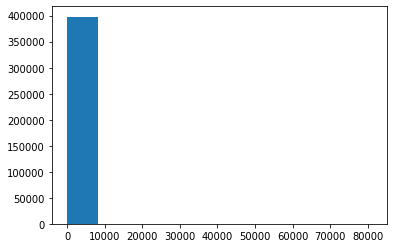

In [ ]:
plt.hist(retail.Quantity);

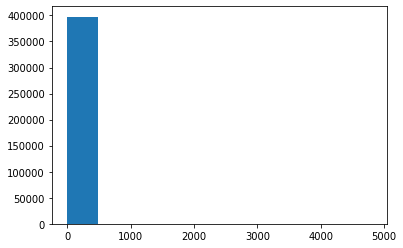

In [ ]:
plt.hist(retail.Quantity[retail.Quantity < 10000]);

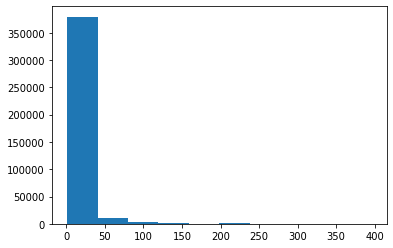

In [ ]:
plt.hist(retail.Quantity[retail.Quantity < 400]);

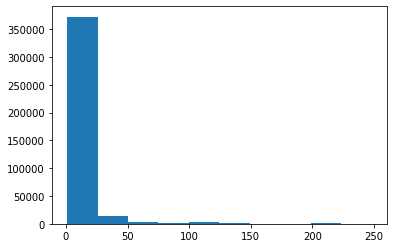

In [ ]:
plt.hist(retail.Quantity[retail.Quantity < 250]);

In [ ]:
less_250 = retail[retail.Quantity < 250]
larger_250 = retail[retail.Quantity >= 250]

In [ ]:
len(less_250), len(larger_250)

(396624, 1300)

In [ ]:
len(larger_250) / len(less_250)

0.0032776634797692526

In [ ]:
retail = retail.drop(index = retail[retail.Quantity >= 250].index)

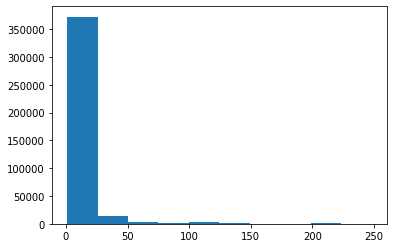

In [ ]:
plt.hist(retail.Quantity);

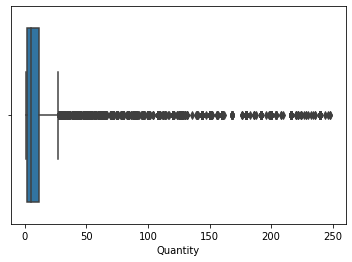

In [ ]:
# outlier를 제거한 데이터를 boxplot으로 살펴보도록 합니다.
sns.boxplot(x=retail.Quantity);

In [ ]:
# 50 이상의 데이터는 많은 부분을 차지하기에 지워주지 않습니다. 
len(retail[retail.Quantity > 50]), len(retail[retail.Quantity <= 50])

(10309, 386315)

In [ ]:
retail.Quantity.describe()

count    396624.000000
mean         10.910144
std          19.815155
min           1.000000
25%           2.000000
50%           5.000000
75%          12.000000
max         248.000000
Name: Quantity, dtype: float64

### **c. Price**

In [ ]:
# unit price는 75%와 max 사이의 수치가 굉장히 큰것을 알 수 있습니다. 
# 이 안에서 unit price가 가지고 있는 분포를 찾아보도록 합니다.
retail.UnitPrice.describe()

count    396624.000000
mean          3.122094
std          22.132578
min           0.000000
25%           1.250000
50%           1.950000
75%           3.750000
max        8142.750000
Name: UnitPrice, dtype: float64

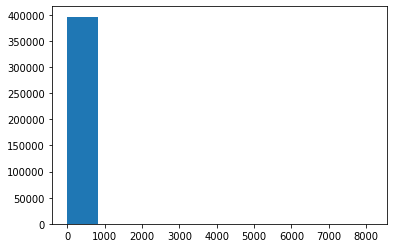

In [ ]:
# outlier가 오른쪽으로 굉장히 많이 존재하는 것을 알 수 있습니다. 
plt.hist(retail.UnitPrice);

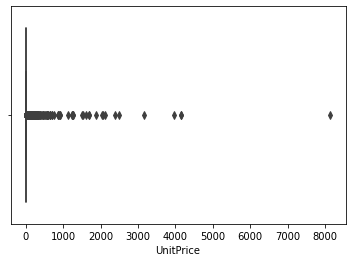

In [ ]:
# hist와 box plot 확인 결과 unit price의 데이터는 0의 근처에 분포하는 것을 알 수 있습니다. 
sns.boxplot(x=retail.UnitPrice);

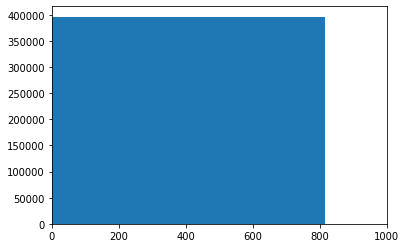

In [ ]:
plt.hist(retail.UnitPrice)
plt.xlim(0, 1000);

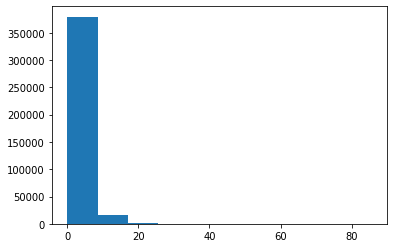

In [ ]:
# 이를 100아래의 데이터로 나누어 확인해 봅니다.
plt.hist(retail["UnitPrice"][retail["UnitPrice"] < 100]);

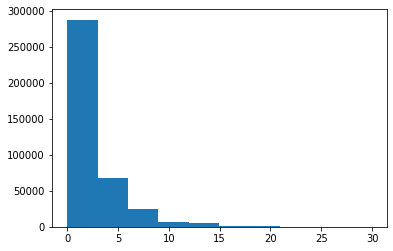

In [ ]:
plt.hist(retail["UnitPrice"][retail["UnitPrice"] < 30]);

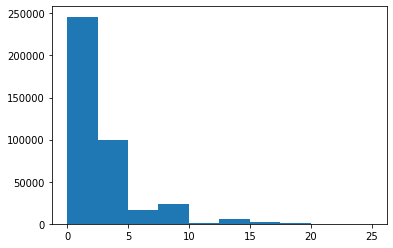

In [ ]:
plt.hist(retail["UnitPrice"][retail["UnitPrice"] < 25]);

In [ ]:
less_25 = retail[retail["UnitPrice"] < 25]
larger_25 = retail[retail["UnitPrice"] >= 25]

In [ ]:
len(larger_25) / len(less_25)

0.002461771767976747

In [ ]:
retail = retail.drop(index = retail[retail["UnitPrice"] >= 25].index)

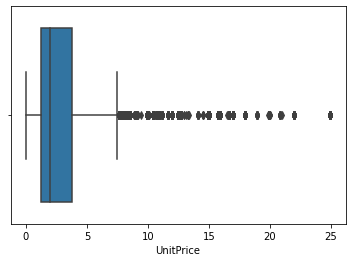

In [ ]:
sns.boxplot(x=retail.UnitPrice);

In [ ]:
# hist와 boxplot을 통해 20이상의 데이터 또한 지워주도록 합니다.
retail = retail.drop(index = retail[retail["UnitPrice"] >= 20].index)

In [ ]:
retail.UnitPrice.describe()

count    395501.000000
mean          2.812133
std           2.785131
min           0.000000
25%           1.250000
50%           1.950000
75%           3.750000
max          19.960000
Name: UnitPrice, dtype: float64

In [ ]:
retail.to_csv('data_cleaned.csv', index=False)

In [ ]:
cleaned_data = retail.copy()

## **2-2. Feature Engineering**

우리가 분석하고자 하는 RFM 지표에 관한 Feature를 생성한 후, `CustomerID`를 **Primary Key**로 둔 `rfm`이라는 데이터프레임을 도출해보도록 하겠습니다.

In [ ]:
cleaned_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 395501 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    395501 non-null  object 
 1   StockCode    395501 non-null  object 
 2   Description  395501 non-null  object 
 3   Quantity     395501 non-null  int64  
 4   InvoiceDate  395501 non-null  object 
 5   UnitPrice    395501 non-null  float64
 6   CustomerID   395501 non-null  object 
 7   Country      395501 non-null  object 
dtypes: float64(1), int64(1), object(6)
memory usage: 27.2+ MB


#### **a.Recency**
**Recency**는 고객의 마지막 구매 시점을 나타내는 것으로, <br> 
산업에 따라 다소 차이가 있지만 일반적으로 ***최근에 구매한 고객일수록 현재의 관계에 유의하다고 판단*** 할 수 있습니다.

In [ ]:
# 구매 일자 datetime 형식으로 변환
cleaned_data['InvoiceDate'] = pd.to_datetime(cleaned_data['InvoiceDate'], format='%d-%m-%Y %H:%M')

# 해당 데이터셋의 마지막 거래 일자 확인
max_date = max(cleaned_data['InvoiceDate'])

# 각 데이터별 거래 일자 경과 확인
cleaned_data['DateDiff'] = max_date - cleaned_data['InvoiceDate']

In [ ]:
# 고객별로 요약
rfm_r = cleaned_data.groupby('CustomerID', as_index=False)['DateDiff'].min()

In [ ]:
rfm_r.head()

,CustomerID,DateDiff
0,12347.0,1 days 20:58:00
1,12348.0,74 days 23:37:00
2,12349.0,18 days 02:59:00
3,12350.0,309 days 20:49:00
4,12352.0,35 days 22:13:00


In [ ]:
seconds_value = []

for i in range(len(rfm_r.DateDiff)):
    seconds_value.append(rfm_r.DateDiff[i].total_seconds())

rfm_r.DateDiff = seconds_value

In [ ]:
rfm_r.head()

,CustomerID,DateDiff
0,12347.0,161880.0
1,12348.0,6478620.0
2,12349.0,1565940.0
3,12350.0,26772540.0
4,12352.0,3103980.0


#### **b. Frequency** 

**Frequency**는 구매 빈도로서 고객이 정해진 기간동안 얼마나 자주 구매했는지를 나타내는 지표 입니다. <br>
이는 고객의 구매 또는 이용 활동성 등을 판단할 수 있습니다.

In [ ]:
# 고객별 구매 빈도 계산
rfm_f = cleaned_data.groupby('CustomerID', as_index=False)['InvoiceNo'].count()

# column명 변경
rfm_f.columns = ['CustomerID', 'Frequency']

rfm_f.head()

,CustomerID,Frequency
0,12347.0,182
1,12348.0,27
2,12349.0,71
3,12350.0,16
4,12352.0,77


#### **c. Monetary** 

**Monetary**는 일정 기간 동안에 고객의 총 구매 금액을 나타내는 지표로, <br> 지나치게 높은 구매액이 존재할 경우 측정시에 상한선을 두어 전체적인 지수 왜곡을 방지할 수 있습니다.

In [ ]:
# 총 구매 금액 = 개 당 가격 * 구매 수량
cleaned_data['Monetary'] = cleaned_data['Quantity'] * cleaned_data['UnitPrice']

# 고객별 총 구매 금액 확인
rfm_m = cleaned_data.groupby('CustomerID', as_index=False)['Monetary'].sum()

rfm_m.head()

,CustomerID,Monetary
0,12347.0,4310.00
1,12348.0,1437.24
2,12349.0,1417.60
3,12350.0,294.40
4,12352.0,1385.74


### **d. RFM Data**
데이터프레임을 합치는 방법에는 여러가지가 있습니다. 이번 프로젝트에서는 총 3개의 데이터프레임을 `CustomerID`를 기준으로 합쳐야 하므로, pandas의 `.join()` 메서드를 활용해보겠습니다.

In [ ]:
rfm_r = rfm_r.set_index('CustomerID')
rfm_f = rfm_f.set_index('CustomerID')
rfm_m = rfm_m.set_index('CustomerID')

In [ ]:
rfm_m.head()

,Monetary
CustomerID,
12347.0,4310.00
12348.0,1437.24
12349.0,1417.60
12350.0,294.40
12352.0,1385.74


In [ ]:
rfm = rfm_r.join([rfm_f, rfm_m], how='inner')

col_names = ['Recency','Frequency','Monetary']

rfm.columns = col_names

In [ ]:
rfm.head()

,Recency,Frequency,Monetary
CustomerID,,,
12347.0,161880.0,182,4310.00
12348.0,6478620.0,27,1437.24
12349.0,1565940.0,71,1417.60
12350.0,26772540.0,16,294.40
12352.0,3103980.0,77,1385.74


## **2-3. Log Transformation**


#### **a. Recency**

In [ ]:
rfm.describe()

,Recency,Frequency,Monetary
count,4.309000e+03,4309.000000,4309.000000
mean,7.964613e+06,91.784869,1770.426694
std,8.649408e+06,227.979163,6344.957618
min,0.000000e+00,1.000000,2.900000
25%,1.476360e+06,17.000000,299.340000
50%,4.329960e+06,41.000000,656.630000
75%,1.227180e+07,100.000000,1599.520000
max,3.223782e+07,7828.000000,233618.640000


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


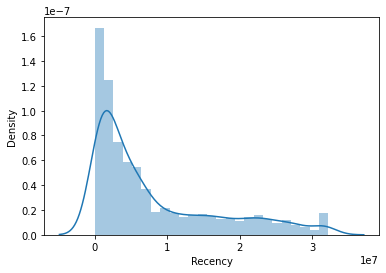

In [ ]:
sns.distplot(rfm["Recency"]);

In [ ]:
# log transformation을 시행하기전 value가 0인 데이터는 삭제해 줍니다. 
zero_value = rfm[rfm.Recency == rfm.Recency.min()]
zero_value

,Recency,Frequency,Monetary
CustomerID,,,
12680.0,0.0,52,862.81


In [ ]:
rfm = rfm.drop(zero_value.index)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


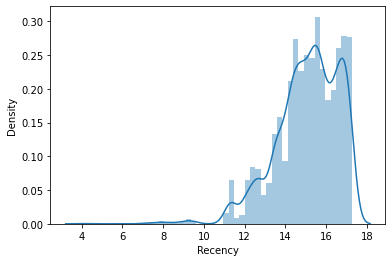

In [ ]:
# right skewed 되어 있는 분포에 log transformtion을 시행해 줍니다. 아래와 같이 완전한 normal distribution을 띄고 있지는 않지만 skewedness가
# 완화 되었음을 알 수 있습니다.
recency_log = np.log(rfm['Recency'])

sns.distplot(recency_log);

#### **b.Frequency**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


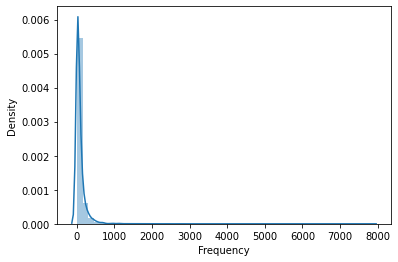

In [ ]:
sns.distplot(rfm["Frequency"]);

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


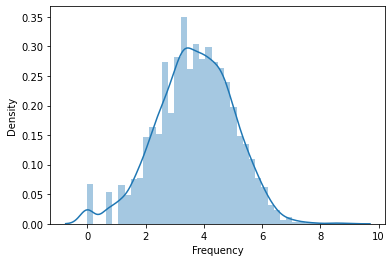

In [ ]:
frequency_log = np.log(rfm['Frequency'])

sns.distplot(frequency_log);

#### **c. Monetary**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


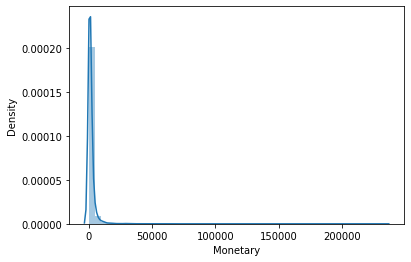

In [ ]:
sns.distplot(rfm["Monetary"]);

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


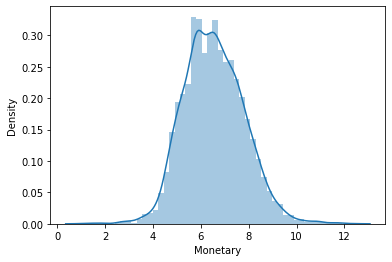

In [ ]:
monetary_log = np.log(rfm['Monetary'])

sns.distplot(monetary_log);

## **2-4. Data Scaling**

스케일링은 데이터의 단위에 따른 왜곡을 방지한다는 측면에서 매우 중요한 과정이라고 할 수 있습니다. 대표적인 스케일링 방법에는 **MinMaxScaler()**, **StandardScaler()**가 존재하는데요. 이번 프로젝트에서는 **`평균을 0`**, **`표준편차를 1`**로 정규화하는 **StandardScaler()**를 활용해보겠습니다. 해당 메서드에 대한 자세한 정보는 [공식문서]((https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html))를 참고해주세요.
- 추후 **`MinMaxScaler()`**는 데이터를 어떠한 메커니즘으로 스케일링을 진행하는지 [공식문서](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html)를 통해 확인해보시기 바랍니다!

In [ ]:
rfm.head()

,Recency,Frequency,Monetary
CustomerID,,,
12347.0,161880.0,182,4310.00
12348.0,6478620.0,27,1437.24
12349.0,1565940.0,71,1417.60
12350.0,26772540.0,16,294.40
12352.0,3103980.0,77,1385.74


In [ ]:
log_rfm = pd.concat([recency_log, frequency_log, monetary_log], axis=1)

log_rfm.head()

,Recency,Frequency,Monetary
CustomerID,,,
12347.0,11.994611,5.204007,8.368693
12348.0,15.684018,3.295837,7.270480
12349.0,14.263997,4.262680,7.256721
12350.0,17.102887,2.772589,5.684939
12352.0,14.948196,4.343805,7.233990


In [ ]:
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(log_rfm)

In [ ]:
print('mean: ', rfm_scaled.mean(axis=0).round(2))
print('std: ', rfm_scaled.std(axis=0).round(2))

mean:  [-0. -0. -0.]
std:  [1. 1. 1.]


# **Part 3. Build Clustering Model**


In [ ]:
sse = {}

for k in range(1,10):
  kmeans = KMeans(n_clusters=k, random_state=1)
  kmeans.fit(rfm_scaled)
  sse[k] = kmeans.inertia_

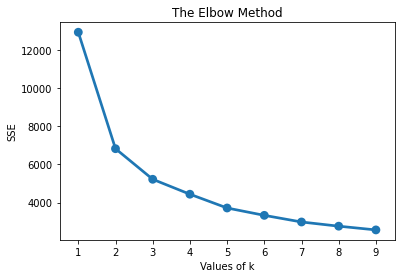

In [ ]:
# 결과 시각화

plt.title('The Elbow Method')
plt.xlabel('Values of k')
plt.ylabel('SSE')
sns.pointplot(x=list(sse.keys()), y=list(sse.values()))
plt.show()

> **🔍 해설**
- Elbow Method의 결과를 종합해본 결과 **최적의 k값**은 **3**으로 두고 K-Means Clustering을 진행하는 것이 좋을 것 같습니다.

##### **a. 3 Clusters**

In [ ]:
# 최종 모델 학습
kmeans = KMeans(n_clusters=3, max_iter=50, random_state=42)
kmeans.fit(rfm_scaled)

# 고객별 클러스터 지정
cluster_labels = kmeans.labels_

rfm_k3 = rfm.assign(Cluster = cluster_labels)

In [ ]:
rfm_k3.head()

,Recency,Frequency,Monetary,Cluster
CustomerID,,,,
12347.0,161880.0,182,4310.00,1
12348.0,6478620.0,27,1437.24,2
12349.0,1565940.0,71,1417.60,2
12350.0,26772540.0,16,294.40,0
12352.0,3103980.0,77,1385.74,2


In [ ]:
rfm_k3.groupby(['Cluster']).agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'Monetary': ['mean','count']
}).round(0)

Recency Frequency Monetary      
               mean      mean     mean count
Cluster                                     
0        14291607.0      15.0    273.0  1547
1         1017204.0     273.0   5788.0   891
2         6044957.0      69.0   1096.0  1870

In [ ]:
cluster_0 = rfm_k3[rfm_k3.Cluster == 0]
cluster_1 = rfm_k3[rfm_k3.Cluster == 1]
cluster_2 = rfm_k3[rfm_k3.Cluster == 2]

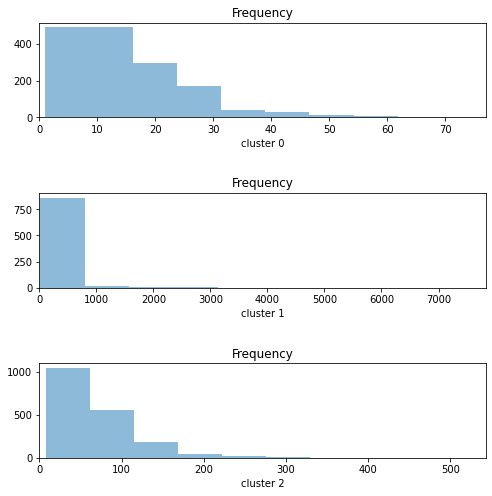

In [ ]:
var = [cluster_0.Frequency, cluster_1.Frequency, cluster_2.Frequency]
cluster = ['cluster 0', 'cluster 1', 'cluster 2']

fig, ax = plt.subplots(3,1, figsize=[8,8])

for i in range(len(var)):
  variable= var[i]
  ax[i].hist(variable, alpha=0.5)
  ax[i].set_xlim(0, var[i].max())
  ax[i].set_xlabel(f'{cluster[i]}')
  ax[i].set_title('Frequency')

plt.subplots_adjust(hspace=0.8)


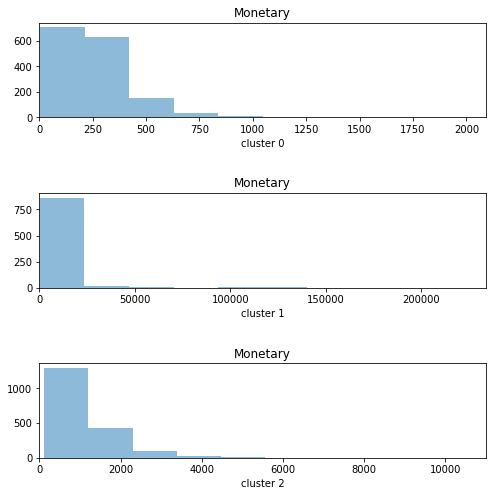

In [ ]:
var = [cluster_0.Monetary, cluster_1.Monetary, cluster_2.Monetary]

fig, ax = plt.subplots(3,1, figsize=[8,8])

for i in range(len(var)):
  variable= var[i]
  ax[i].hist(variable, alpha=0.5)
  ax[i].set_xlim(0, var[i].max())
  ax[i].set_xlabel(f'{cluster[i]}')
  ax[i].set_title('Monetary')

plt.subplots_adjust(hspace=0.8)

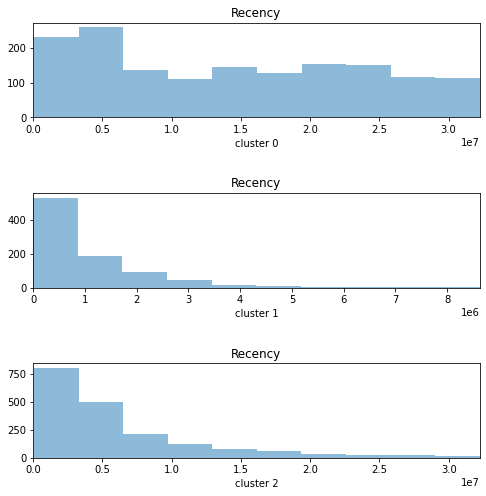

In [ ]:
var = [cluster_0.Recency, cluster_1.Recency, cluster_2.Recency]

fig, ax = plt.subplots(3,1, figsize=[8,8])

for i in range(len(var)):
  variable= var[i]
  ax[i].hist(variable, alpha=0.5)
  ax[i].set_xlim(0, var[i].max())
  ax[i].set_xlabel(f'{cluster[i]}')
  ax[i].set_title('Recency')
  

plt.subplots_adjust(hspace=0.8)

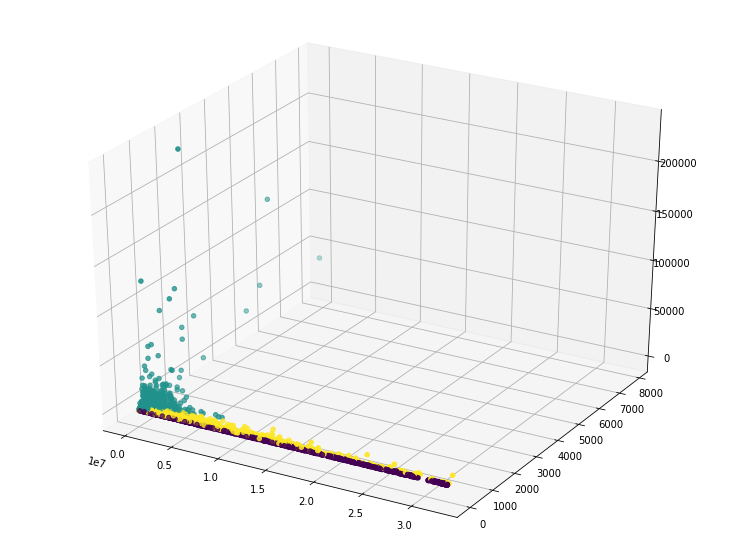

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize = (13,10))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(xs = rfm_k3.Recency, ys = rfm_k3.Frequency, zs = rfm_k3.Monetary, c=rfm_k3.Cluster)

plt.show()

##### **b. 4 Clusters**

In [ ]:
kmeans = KMeans(n_clusters=4, max_iter=50, random_state=42)
kmeans.fit(rfm_scaled)

# 고객별 클러스터 지정
cluster_labels = kmeans.labels_

rfm_k4 = rfm.assign(Cluster = cluster_labels)

In [ ]:
rfm_k4.Cluster.value_counts()

1    1384
0    1324
2     832
3     768
Name: Cluster, dtype: int64

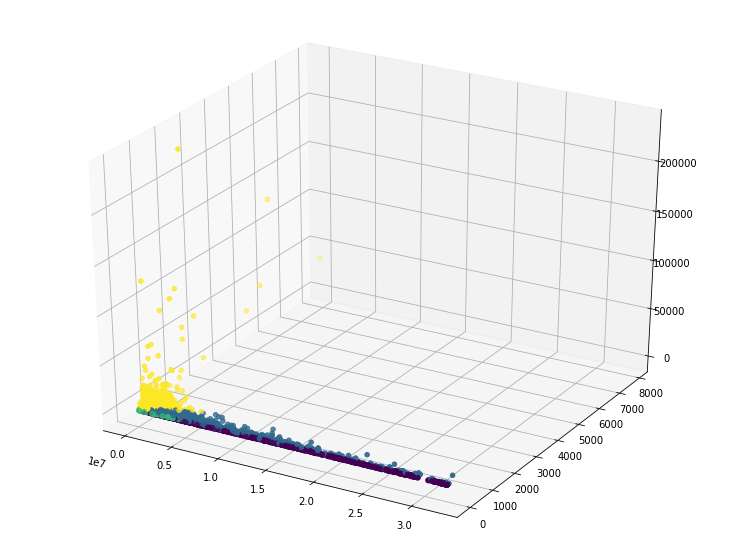

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize = (13,10))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(xs = rfm_k4.Recency, ys = rfm_k4.Frequency, zs = rfm_k4.Monetary, c=rfm_k4.Cluster)

plt.show()

# **Part 4. 클러스터별 특징 분석** 


우리는 클러스터링을 통해 고객 데이터를 3개의 클러스터로 분류하였습니다. 지금부터는 클러스터별로 어떠한 특징이 있는지 RFM 지표를 바탕으로 살펴보도록 하겠습니다.

In [ ]:
rfm_k3.to_csv('rfm_data.csv', index=False)

In [ ]:
rfm_k3.head()

,Recency,Frequency,Monetary,Cluster
CustomerID,,,,
12347.0,161880.0,182,4310.00,1
12348.0,6478620.0,27,1437.24,2
12349.0,1565940.0,71,1417.60,2
12350.0,26772540.0,16,294.40,0
12352.0,3103980.0,77,1385.74,2


In [ ]:
# seconds를 다시 days로 바꿉니다.
rfm_k3.Recency = rfm_k3.Recency // (24 * 3600)

In [ ]:
cluster_avg = rfm_k3.groupby(['Cluster']).mean()
cluster_avg

,Recency,Frequency,Monetary
Cluster,,,
0,164.883646,14.795087,272.542005
1,11.283951,273.436588,5788.053603
2,69.450802,68.945989,1095.790146


> **🔍 해설** 
- 위의 결과를 통해 사용자별로 얼마나 최근에, 얼마나 자주, 얼마나 많은 금액을 지출했는지에 따라 사용자들의 분포를 확인할 수 있습니다. 이 결과를 통해 구매 가능성이 높은 고객을 데이터를 통해 선정할 수 있고, 각 사용자 그룹의 특성에 따라 ***차별화된 마케팅 메세지를 전달할 수 있습니다.***
- 위의 RFM 분석을 수행한다고 생각해보겠습니다. 사용자 그룹 `Cluster 0`, `Cluter 1`, `Cluter 2` 구매기록을 체크해보았을 때, 세 개의 Cluster 중에서 어느 그룹이 더 해당 서비스를 많이 이용하는 충성 고객이라고 할 수 있을까요?
- `Cluster 1` 임을 알 수 있습니다. `Cluster 1`는 최근에 구매한 소비자들이 많고 구매 빈도가 높기 때문에 지출이 큰 소비자 그룹임을 알 수 있습니다. 즉, 이 그룹은 해당 서비스에 **충성도가 높은 그룹**이라고 생각할 수 있습니다.
- 그 다음으로 충성도가 높은 그룹은 `Cluster 2` 이고 가장 충성도가 낮은 그룹은 `Cluster 0`임을 알 수 있습니다. 
- 이에 따라 `Cluster 1`은 최근에도 구매를 잘해주고 있는 사용자이기 때문에 `Cluster 1` 그룹 사용자 보다는 `Cluster 0` 사용자에게 할인 쿠폰을 보내줄 수도 있습니다. 또는 반대로 이미 `Cluster 1` 그룹 사용자가 서비스를 잘 사용하고 있기 때문에 더 잘 사용하라는 의미에서 VIP 고객을 위한 할인 쿠폰을 보내줄 수도 있습니다. 이런식으로 RFM을 사용하면 사용자의 특성별로 각기 다른 정책을 적용하고 서비스를 더 잘 사용하게끔 유도하는 전략을 세워볼 수 있기 때문에 굉장히 유용함을 알 수 있습니다.

In [ ]:
rfm.Recency = rfm.Recency // (24 * 3600)

In [ ]:
population_avg = rfm.mean()
population_avg

Recency        91.690344
Frequency      91.794104
Monetary     1770.637376
dtype: float64

In [ ]:
relative_imp = cluster_avg / population_avg - 1

In [ ]:
relative_imp.round(2)

,Recency,Frequency,Monetary
Cluster,,,
0,0.80,-0.84,-0.85
1,-0.88,1.98,2.27
2,-0.24,-0.25,-0.38


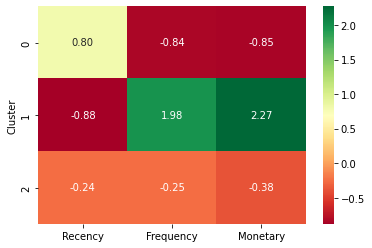

In [ ]:
sns.heatmap(data=relative_imp, annot=True, fmt='.2f', cmap = "RdYlGn");

> **🔍 해설** 
- 위의 heatmap을 통해서 각 Cluster의 Recency, Frequency, Monetary가 전체 population에 얼마만큼 차지하는가를 통해 중요도를 확인할 수 있습니다. 
- `Cluster 1`의 Frequency와 Monetary 요소의 중요도가 높은것을 알 수 있습니다. 즉, `Cluster 1` 소비자 그룹은 전체 population의 구매 빈도수와 소비량에 많은 부분을 차지하고 있음을 알 수 있습니다. 그러기에 이 그룹의 소비자들이 구매 빈도수와 구매량을 계속 유지하는 것는 회사 입장에서 중요한 부분 일것입니다.